<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/12_Using_Public_Datasets_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

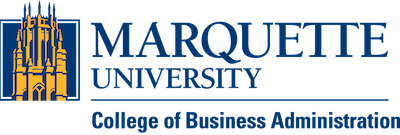

# BUAN 4061: Advanced Business Analytics
# Using Public datasets 1

## TensorFlow DataSets

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content created by `Dr. Kambiz Saffarizadeh`

List of available datasets:

https://www.tensorflow.org/datasets/catalog/overview

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

`tfds` shows a progress bar when dowloading datasets. If you wish to disable the progress bar, run the following code:

In [3]:
tfds.disable_progress_bar()

##Loading Data via `keras.datasets`

In [4]:
(training_images_1, training_labels_1), (test_images_1, test_labels_1) =  tf.keras.datasets.fashion_mnist.load_data()

In [5]:
training_images_1.shape

(60000, 28, 28)

##Loading Data via tfds
Read the following documentation to learn how tfds.load works:

https://www.tensorflow.org/datasets/api_docs/python/tfds/load

You can retrieve the same dataset via `tfds` using the following code:

In [6]:
(training_images_2, training_labels_2), (test_images_2, test_labels_2) =  tfds.as_numpy(tfds.load('fashion_mnist', split = ['train', 'test'], batch_size = -1, as_supervised=True))

In [7]:
training_images_2.shape

(60000, 28, 28, 1)

While this code is more complicated, it gives us more flexibility to work with the dataset.

In the code above, we attempted to get the whole dataset by setting `batch_size = -1` and convert the whole dataset to numpy `(tfds.as_numpy())` so that the result look similar to our previous examples.

However, in reality we don't need to take these steps to train our models. Instead, we use the following approach.



###Creating train and validation splits


In [8]:
data = tfds.load('fashion_mnist', split='train', as_supervised=True)
val_data = tfds.load('fashion_mnist', split='test', as_supervised=True)

In [9]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

###Creating train, validation, and test splits

We can use TensorFlow's subsplit API:

In [10]:
train_data, info = tfds.load('horses_or_humans', split='train[:80%]', as_supervised=True, with_info = True)
validation_data = tfds.load('horses_or_humans', split='train[80%:]', as_supervised=True)
test_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

In [11]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='/root/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)

In [13]:
info.features['label'].names

['horses', 'humans']

In [14]:
classes = info.features['label'].names

**Alternatively, we can load the data as follows:**

In [15]:
[train_data, validation_data, test_data], info = tfds.load('horses_or_humans', split=['train[:80%]', 'train[80%:]', 'test'], as_supervised=True, with_info = True)

In [16]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [17]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='/root/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)

Read the following notebook to learn more about loading datasets via tfds.

https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb

###Prepare Data Batches

In [18]:
train_batches = train_data.cache().shuffle(100).batch(32).prefetch(1)
validation_batches = validation_data.batch(32).prefetch(1)
test_batches = test_data.batch(32)

###Model Architecture
You can include preprocessing layers in your keras models. By doing so, you don't need to be worried about preprocessing the data even when you want to use your model for inference.

You can also add data augmentation layers. These layers will only be used during the training and will not change the model input when used for inference.

In [19]:
horse_human_model = tf.keras.Sequential([
  # Preprocessing and Augmentation Layers
  tf.keras.layers.Resizing(300, 300, crop_to_aspect_ratio=True),
  tf.keras.layers.Rescaling(1/255.),
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(40, fill_mode='nearest'),
  # Feature Extraction Layers
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  # Classification Layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
horse_human_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [21]:
# Training
history = horse_human_model.fit(train_batches, epochs=10, validation_data=validation_batches)

Epoch 1/10
26/26 [==============================] - 16s 287ms/step - loss: 0.6551 - accuracy: 0.6168 - val_loss: 0.4109 - val_accuracy: 0.8488
Epoch 2/10
26/26 [==============================] - 1s 53ms/step - loss: 0.4404 - accuracy: 0.8017 - val_loss: 0.5351 - val_accuracy: 0.8146
Epoch 3/10
26/26 [==============================] - 1s 51ms/step - loss: 0.4203 - accuracy: 0.8370 - val_loss: 0.3097 - val_accuracy: 0.8585
Epoch 4/10
26/26 [==============================] - 1s 51ms/step - loss: 0.3264 - accuracy: 0.8674 - val_loss: 0.4215 - val_accuracy: 0.8146
Epoch 5/10
26/26 [==============================] - 1s 51ms/step - loss: 0.2956 - accuracy: 0.8820 - val_loss: 0.4029 - val_accuracy: 0.8390
Epoch 6/10
26/26 [==============================] - 1s 51ms/step - loss: 0.2963 - accuracy: 0.8783 - val_loss: 0.3171 - val_accuracy: 0.8488
Epoch 7/10
26/26 [==============================] - 1s 51ms/step - loss: 0.2492 - accuracy: 0.9002 - val_loss: 0.2270 - val_accuracy: 0.8878
Epoch 8/10


In [22]:
# Test Evaluation
horse_human_model.evaluate(test_batches)

8/8 [==============================] - 1s 52ms/step - loss: 1.4657 - accuracy: 0.6641


[1.4657418727874756, 0.6640625]

###Prediction and Inference

In [23]:
image_batch, label_batch = validation_batches.take(1).get_single_element() # returns 1 batch of data

1/1 [==============================] - 0s 411ms/step
Real Label: horses
Predicted Label: horses


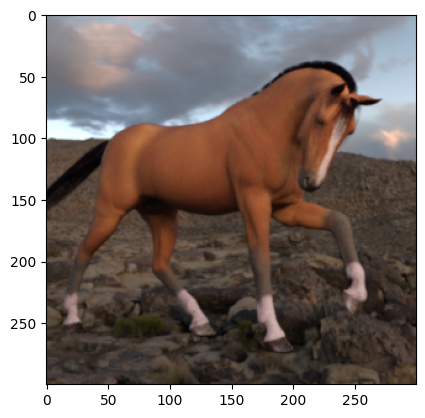

In [24]:
num = 5 # defines a variable num with a value of 5

# uses the trained model horse_human_model to make predictions on a batch of images (image_batch).
# selects a single image from the batch using slicing (image_batch[num:num+1])
# and passes it to the model's predict method to get the predicted probability
# checks if the predicted probability is greater than 0.5 (assuming a binary classification problem)
inference = (horse_human_model.predict(image_batch[num:num+1]).item()>0.5)

# uses the result of the inference to determine the predicted class label (inference) from a predefined list of classes (classes)
inference = classes[inference]

# displays the selected image using plt.imshow
plt.imshow(image_batch[num])

# prints the real label of the image (classes[label_batch[num]]) and the predicted label (inference).
print(f'Real Label: {classes[label_batch[num]]}')
print(f'Predicted Label: {inference}')

###Alternative Way to Create the Model

In [25]:
horse_human_model = tf.keras.Sequential([
  tf.keras.layers.Resizing(300, 300, crop_to_aspect_ratio=True),
  tf.keras.layers.Rescaling(1/255.),
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(40, fill_mode='nearest'),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

horse_human_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

train_batches = train_data.cache().shuffle(100).batch(32).prefetch(1)
validation_batches = validation_data.batch(32).prefetch(1)

history = horse_human_model.fit(train_batches, epochs=10, validation_data=validation_batches)

Epoch 1/10
26/26 [==============================] - 4s 64ms/step - loss: 0.5839 - accuracy: 0.6886 - val_loss: 0.4359 - val_accuracy: 0.8049
Epoch 2/10
26/26 [==============================] - 2s 58ms/step - loss: 0.3679 - accuracy: 0.8467 - val_loss: 0.3916 - val_accuracy: 0.7902
Epoch 3/10
26/26 [==============================] - 1s 52ms/step - loss: 0.2954 - accuracy: 0.8832 - val_loss: 0.2506 - val_accuracy: 0.8683
Epoch 4/10
26/26 [==============================] - 1s 52ms/step - loss: 0.2430 - accuracy: 0.9075 - val_loss: 0.4004 - val_accuracy: 0.8146
Epoch 5/10
26/26 [==============================] - 1s 51ms/step - loss: 0.2326 - accuracy: 0.9015 - val_loss: 0.2519 - val_accuracy: 0.8732
Epoch 6/10
26/26 [==============================] - 1s 52ms/step - loss: 0.2282 - accuracy: 0.9088 - val_loss: 0.2455 - val_accuracy: 0.8878
Epoch 7/10
26/26 [==============================] - 1s 51ms/step - loss: 0.1776 - accuracy: 0.9270 - val_loss: 0.2085 - val_accuracy: 0.9024
Epoch 8/10
26

When from_logits=False, the loss function assumes that the model's output is already passed through a softmax activation function, which converts the logits into probabilities. This is typical in classification tasks where the final layer of the neural network is a softmax layer, which outputs class probabilities.

On the other hand, when from_logits=True, the loss function expects raw logits as input, meaning that the model's output has not yet been normalized into probabilities. In this case, the loss function internally applies a softmax function to the logits before computing the loss.

###Manually preprocess the data

Install and import `tensorflow_addons

In [26]:
!pip install tensorflow-addons

In [27]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Now we can use this addon whenever needed.

We start by creating a function that can be used to augment the data.

In [28]:
def augment_images(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.random_flip_left_right(image)
  image = tfa.image.rotate(image, 40, interpolation='NEAREST')
  return image, label

train_data = train_data.map(augment_images)

## Extra Example: Cats vs Dogs

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [3]:
(train_examples, validation_examples), info = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:]'],
    with_info = True,
    as_supervised = True
)

In [31]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, 

In [4]:
classes = info.features['label'].names
classes

['cat', 'dog']

###Prepare Data Batches

This dataset has images with different sizes, It is currently not easy to batch images with different sizes.

So, we will apply a resizing function on the training set to simplify the problem.

In [5]:
def resizer(image, label):
  image = tf.image.resize(image, (224, 224))
  return image, label

In [6]:
train_examples_batches = train_examples.cache().map(resizer).shuffle(1000).batch(32).prefetch(1)
validation_examples_batches = validation_examples.map(resizer).batch(32).prefetch(1)

###Model
Create a model with preprocessing, data augmentation, feature extraction, and classification layers.

In [7]:
# Deletes the model if it was created previously
del(cat_dog_model)

NameError: name 'cat_dog_model' is not defined

In [8]:
cat_dog_model = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224, crop_to_aspect_ratio=True),
  tf.keras.layers.Rescaling(1/255.),
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(40, fill_mode='nearest'),
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", trainable=False),
  tf.keras.layers.Dense(1, activation='sigmoid') # you could also solve this problem with 2 nodes each of which representing a class
])

In [9]:
cat_dog_model.compile(
    optimizer = 'adam',
    loss = tf.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
history = cat_dog_model.fit(train_examples_batches, epochs = 1, validation_data = validation_examples_batches)

582/582 [==============================] - 63s 90ms/step - loss: 0.1889 - accuracy: 0.9227 - val_loss: 0.0562 - val_accuracy: 0.9832


In [39]:
image_batch, label_batch = validation_examples_batches.take(1).get_single_element() # returns 1 batch of data

1/1 [==============================] - 0s 23ms/step
Real Label: dog
Predicted Label: dog


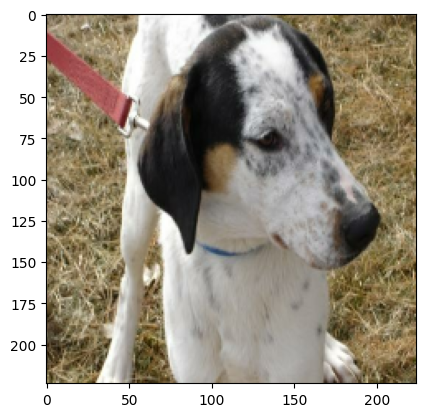

In [49]:
num = 5
inference = (cat_dog_model.predict(image_batch[num:num+1]).item()>0.5)
inference = classes[inference]
plt.imshow(image_batch[num]/255)
print(f'Real Label: {classes[label_batch[num]]}')
print(f'Predicted Label: {inference}')

In [11]:
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 2s 2s/step
Predicted Label: cat


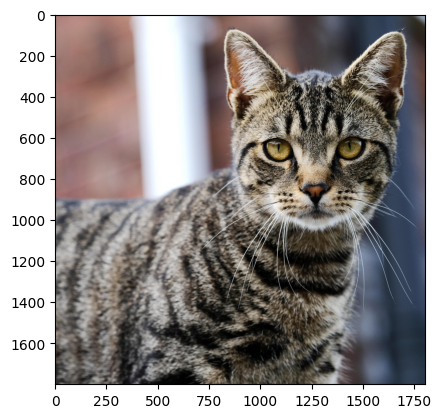

In [12]:
img = image.img_to_array(image.load_img('cat.jpeg'))
inference = (cat_dog_model.predict(img[tf.newaxis, ...]).item()>0.5)
inference = classes[inference]
plt.imshow(img/255.)
print(f'Predicted Label: {inference}')

1/1 [==============================] - 1s 541ms/step
Predicted Label: dog


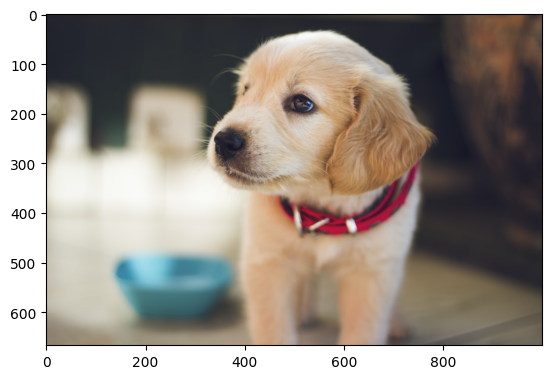

In [13]:
img = image.img_to_array(image.load_img('dog.jpeg'))
inference = (cat_dog_model.predict(img[tf.newaxis, ...]).item()>0.5)
inference = classes[inference]
plt.imshow(img/255.)
print(f'Predicted Label: {inference}')